In [ ]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from collections import Counter

from sceneclassification.config import *
from sceneclassification.datasets import SceneEmbeddingDataset

In [2]:
CSV_PATH = "../data/clip_embeddings_sunrgbd_with_labels.csv"

df = pd.read_csv(CSV_PATH)
df.head()

,image,depthmap,caption,image_embedding,depthmap_embedding,caption_embedding,label
0,/content/drive/MyDrive/NNDL Project/SUNRGBD/kv...,/content/drive/MyDrive/NNDL Project/SUNRGBD/kv...,"In a room with a white ceiling, a large wooden...","[-0.07111385464668274, 0.024072768166661263, 0...","[-0.02177097275853157, 0.012342271395027637, -...","[0.010008405894041061, 0.04413926973938942, 0....",furniture_store
1,/content/drive/MyDrive/NNDL Project/SUNRGBD/kv...,/content/drive/MyDrive/NNDL Project/SUNRGBD/kv...,A large bed with a black headboard is in a bed...,"[-0.021205276250839233, 0.013201044872403145, ...","[-0.011344404891133308, 0.018814094364643097, ...","[0.027301784604787827, 0.02024081163108349, 0....",furniture_store
2,/content/drive/MyDrive/NNDL Project/SUNRGBD/kv...,/content/drive/MyDrive/NNDL Project/SUNRGBD/kv...,"In a spacious room with a beige carpet, a larg...","[-0.06175360456109047, 0.007973769679665565, 0...","[0.0018969185184687376, 0.03057548590004444, -...","[0.015705956146121025, 0.03315078839659691, 0....",furniture_store
3,/content/drive/MyDrive/NNDL Project/SUNRGBD/kv...,/content/drive/MyDrive/NNDL Project/SUNRGBD/kv...,A large bed with a blue comforter and white sh...,"[-0.05020633712410927, -0.00923844613134861, 0...","[-0.01030831690877676, 0.005144125781953335, -...","[0.025165921077132225, 0.03504015877842903, 0....",furniture_store
4,/content/drive/MyDrive/NNDL Project/SUNRGBD/kv...,/content/drive/MyDrive/NNDL Project/SUNRGBD/kv...,"In a well-lit bedroom, a large bed with a blue...","[-0.009456997737288475, 0.03842872381210327, 0...","[-0.00496811093762517, 0.0029877489432692528, ...","[0.05277388542890549, 0.02159283310174942, 0.0...",furniture_store


Number of samples: 1385

Label distribution:


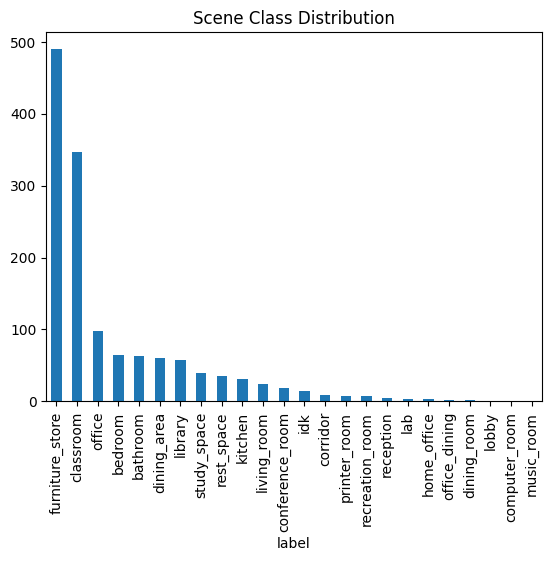

In [3]:
# Dataset 
print(f"Number of samples: {len(df)}")
print("\nLabel distribution:")
Counter(df['label'])

plt.figure()
pd.Series(df['label']).value_counts().plot(kind='bar')
plt.title("Scene Class Distribution")
plt.show()

In [4]:
# Embedding shapes
import ast

def get_shape(col):
    return np.array(ast.literal_eval(df[col].iloc[0])).shape

print("Image embedding shape:", get_shape("image_embedding"))
print("Depth embedding shape:", get_shape("depthmap_embedding"))
print("Caption embedding shape:", get_shape("caption_embedding"))

Image embedding shape: (512,)
Depth embedding shape: (512,)
Caption embedding shape: (512,)


In [5]:
dataset = SceneEmbeddingDataset(CSV_PATH)

sample = dataset[0]
for k, v in sample.items():
    if torch.is_tensor(v):
        print(k, v.shape)
    else:
        print(k, v)

image_emb torch.Size([512])
depth_emb torch.Size([512])
text_emb torch.Size([512])
label torch.Size([])


In [6]:
for col in ["image_embedding", "depthmap_embedding", "caption_embedding"]:
    arr = np.vstack(df[col].apply(lambda x: np.array(ast.literal_eval(x))))
    print(col)
    print("  NaNs:", np.isnan(arr).any())
    print("  Infs:", np.isinf(arr).any())

image_embedding
  NaNs: False
  Infs: False
depthmap_embedding
  NaNs: False
  Infs: False
caption_embedding
  NaNs: False
  Infs: False


In [7]:
from torch.utils.data import DataLoader

loader = DataLoader(dataset, batch_size=8, shuffle=True)
batch = next(iter(loader))

for k, v in batch.items():
    print(k, v.shape)

image_emb torch.Size([8, 512])
depth_emb torch.Size([8, 512])
text_emb torch.Size([8, 512])
label torch.Size([8])
